In [43]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

%matplotlib inline

Length of data: 187000


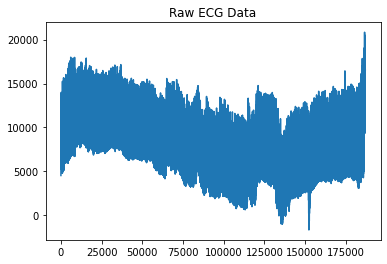

In [55]:
SR = 250
data = np.array(list(map(float, open('../data/ecg_250hz.txt').read().split())))

print(f'Length of data: {len(data)}')

plt.title('Raw ECG Data')
plt.plot(data)
plt.show()

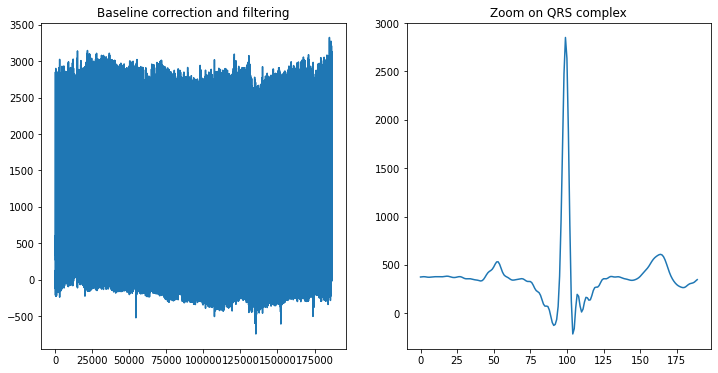

In [52]:
# Task 1: Baseline wander correction

def filter(data):
    assert len(data) > 200

    order = int(SR * 0.3)
    frequency = np.array([3, 45])
    frequency = 2.0 * frequency / SR

    a = np.array([1])
    b = sp.firwin(numtaps=order, cutoff=frequency, pass_zero=False)

    filtered = sp.filtfilt(b, a, data)
    filtered = filtered[100:-100]

    return filtered

filtered = filter(data)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].set_title('Baseline correction and filtering')
ax[0].plot(filtered)
ax[1].set_title('Zoom on QRS complex')
ax[1].plot(filtered[10:200])
plt.show()

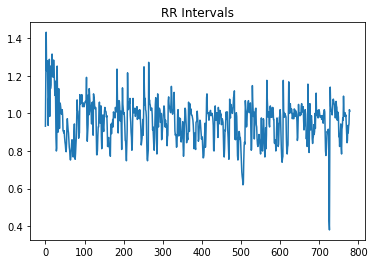

In [53]:
# Task 2: Find R peaks and RR intervals

def get_r_peaks(data):
    peaks = (data > np.max(data) // 2 + 200)

    rpks = []
    last = None
    for i in range(len(peaks)):
        if peaks[i]:
            if last:
                if i - last > 10:
                    rpks.append(i)
            last = i

    rpks = np.array(rpks)
    return rpks

def get_rr_intervals(peaks):
    intervals = []

    for i in range(len(peaks) - 1):
        intervals.append((peaks[i+1] - peaks[i]) / SR)

    return intervals

R_PEAKS = get_r_peaks(filtered)
RR_INTERVALS = get_rr_intervals(R_PEAKS)

plt.title('RR Intervals')
plt.plot(RR_INTERVALS)
plt.show()

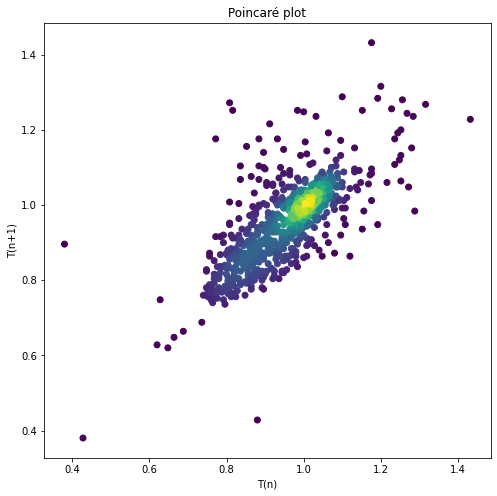

In [50]:
# Task 3: Create Poincaré plot

def poincare_plot(intervals):
    # Color density implementation based on:
    # https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib

    X, Y = [], []
    for i in range(len(intervals) - 1):
        X.append(intervals[i])
        Y.append(intervals[i+1])
    
    X = np.array(X)
    Y = np.array(Y)

    xy = np.vstack([X, Y])
    C = gaussian_kde(xy)(xy)

    plt.figure(figsize=(8, 8))
    plt.title('Poincaré plot')
    plt.scatter(X, Y, c=C)
    plt.xlabel('T(n)')
    plt.ylabel('T(n+1)')
    plt.show()

poincare_plot(RR_INTERVALS)